In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import pickle
import pandas as pd
from tqdm import tqdm
import seaborn as sns

from graspy.plot import heatmap

from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.independence_tests.rv_corr import RVCorr
from mgcpy.independence_tests.mgc import MGC

from simulations import rho_ER_marg, rho_sbm_marg, rho_sbm_diff_block
from utils import sbm_params, pearson_power, identity, to_distance_mtx, to_kernel, triu_no_diag

In [12]:
rho_arr = np.around(np.linspace(-0.3, 0.9, 14), 1)
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.7, b=0.3)
k = 2
n = 100
mc = 500
sbm_ts = {'pearson': np.zeros((rho_arr.size, mc)),
          'dcorr': np.zeros((rho_arr.size, mc))}
test_names = ['pearson', 'dcorr']
for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        for name in test_names:
            if name == 'pearson':
                indept_test = RVCorr(which_test='pearson')
                test_stat_alt, _ = indept_test.test_statistic(
                    matrix_X=triu_no_diag(A),
                    matrix_Y=triu_no_diag(B))
            elif name == 'dcorr':
                indept_test = DCorr(compute_distance_matrix=identity)
                test_stat_alt, _ = indept_test.test_statistic(
                    matrix_X=to_distance_mtx(A),
                    matrix_Y=to_distance_mtx(B))
            sbm_ts[name][i, j] = test_stat_alt

14it [00:20,  1.42s/it]


In [4]:
rho_arr = np.around(np.linspace(-0.6, 0.3, 10), 1)
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.2, b=0.5)
k = 2
n = 100
mc = 500
sbm_marg_ts = {'pearson': np.zeros((rho_arr.size, mc)),
          'dcorr': np.zeros((rho_arr.size, mc))}
test_names = ['pearson', 'dcorr']
for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        for name in test_names:
            if name == 'pearson':
                indept_test = RVCorr(which_test='pearson')
                test_stat_alt, _ = indept_test.test_statistic(
                    matrix_X=triu_no_diag(A),
                    matrix_Y=triu_no_diag(B))
            elif name == 'dcorr':
                indept_test = DCorr(compute_distance_matrix=identity)
                test_stat_alt, _ = indept_test.test_statistic(
                    matrix_X=to_distance_mtx(A),
                    matrix_Y=to_distance_mtx(B))
            sbm_marg_ts[name][i, j] = test_stat_alt

10it [00:14,  1.45s/it]


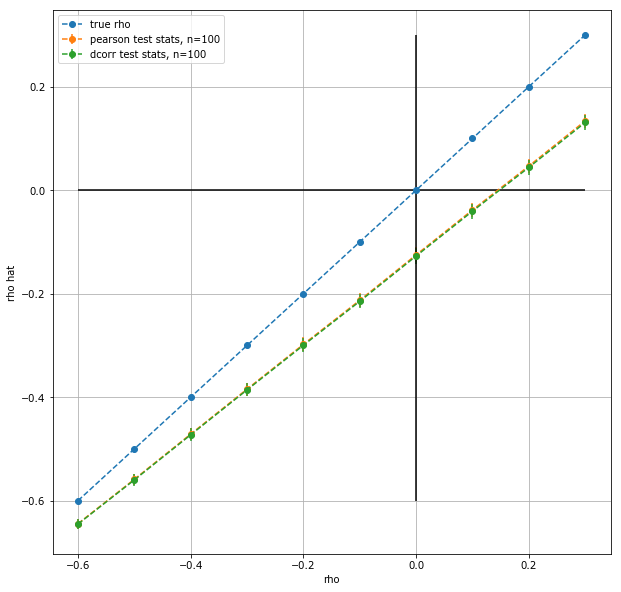

In [6]:
with open('../../results/rho_sbm_marg_teststats.pkl', 'rb') as f:
    ts = pickle.load(f)
plt.figure(figsize=(10,10))
plt.plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle='--')
test_names = ['pearson', 'dcorr']
for name in test_names:
    plt.errorbar(rho_arr, np.mean(ts[name], axis=1), yerr=np.std(ts[name], axis=1),
             marker='o', linestyle='--', label='{} test stats, n=100'.format(name))

plt.hlines(y=0, xmin=np.amin(rho_arr), xmax=np.amax(rho_arr))
plt.vlines(x=0, ymin=np.amin(rho_arr), ymax=np.amax(rho_arr))
plt.grid()
plt.xlabel('rho')
plt.ylabel('rho hat')
plt.legend()

In [9]:
rho_arr = np.around(np.linspace(-0.4, 0.9, 14), 1)
p = 0.5
q = 0.5
n = 100
mc = 500
er_dict = {'pearson': np.zeros((rho_arr.size, mc)),
          'dcorr': np.zeros((rho_arr.size, mc))}
test_names = ['pearson', 'dcorr']

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_ER_marg(rho=rho, p=p, q=q, n=n)
        for name in test_names:
            if name == 'pearson':
                indept_test = RVCorr(which_test='pearson')
                test_stat_alt, _ = indept_test.test_statistic(
                    matrix_X=triu_no_diag(A),
                    matrix_Y=triu_no_diag(B))
            elif name == 'dcorr':
                indept_test = DCorr(compute_distance_matrix=identity)
                test_stat_alt, _ = indept_test.test_statistic(
                    matrix_X=to_distance_mtx(A),
                    matrix_Y=to_distance_mtx(B))
            er_dict[name][i, j] = test_stat_alt

14it [00:19,  1.42s/it]


In [8]:
rho_arr = np.around(np.linspace(-0.4, 0.3, 8), 1)
p = 0.7
q = 0.2
n = 100
mc = 500
er_marg_dict = {'pearson': np.zeros((rho_arr.size, mc)),
          'dcorr': np.zeros((rho_arr.size, mc))}
test_names = ['pearson', 'dcorr']

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_ER_marg(rho=rho, p=p, q=q, n=n)
        for name in test_names:
            if name == 'pearson':
                indept_test = RVCorr(which_test='pearson')
                test_stat_alt, _ = indept_test.test_statistic(
                    matrix_X=triu_no_diag(A),
                    matrix_Y=triu_no_diag(B))
            elif name == 'dcorr':
                indept_test = DCorr(compute_distance_matrix=identity)
                test_stat_alt, _ = indept_test.test_statistic(
                    matrix_X=to_distance_mtx(A),
                    matrix_Y=to_distance_mtx(B))
            er_marg_dict[name][i, j] = test_stat_alt

8it [00:12,  1.60s/it]


In [14]:
with open('../../results/rho_sbm_teststats.pkl', 'wb') as f:
    pickle.dump(sbm_ts, f)
with open('../../results/rho_sbm_marg_teststats.pkl', 'wb') as f:
    pickle.dump(sbm_marg_ts, f)
with open('../../results/rho_er_teststats.pkl', 'wb') as f:
    pickle.dump(er_dict, f)
with open('../../results/rho_er_marg_teststats.pkl', 'wb') as f:
    pickle.dump(er_marg_dict, f)

In [16]:
with open('../../results/rho_sbm_teststats.pkl', 'wb') as f:
    pickle.dump(sbm_ts, f)

In [6]:
def new_distance(A):
    distance_mtx_A = 1 - (A / np.max(A))
    return distance_mtx_A

In [7]:
def kernel1(A):
    D_vec = np.sum(A, axis=0)
    with np.errstate(divide="ignore"):
        D_root = 1 / np.sqrt(D_vec)  # this is 10x faster than ** -0.5
    D_root[np.isinf(D_root)] = 0
    D_root = np.diag(D_root)  # just change to sparse diag for sparse support
    I = np.identity(A.shape[0])
    K = I - D_root @ A @ D_root
    return K

In [8]:
rho_arr = np.around(np.linspace(0, 0.5, 5), 1)
P1 = np.array([[0.4, 0.1],[0.1, 0.05]])
P2 = np.array([[0.4, 0.1],[0.1, 0.05]])
k = 2
n = 100
mc = 500
indept_test = DCorr(compute_distance_matrix=identity)
dcorr_ts1 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(A),
            matrix_Y=new_distance(B))
        dcorr_ts1[i, j] = test_stat_alt

dcorr_ts2 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(to_kernel(A)),
            matrix_Y=new_distance(to_kernel(B)))
        dcorr_ts2[i, j] = test_stat_alt

dcorr_ts3 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(kernel1(A)),
            matrix_Y=new_distance(kernel1(B)))
        dcorr_ts3[i, j] = test_stat_alt

dcorr_ts4 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=np.sqrt(new_distance(kernel1(A))),
            matrix_Y=np.sqrt(new_distance(kernel1(B))))
        dcorr_ts4[i, j] = test_stat_alt

5it [00:05,  1.16s/it]
5it [00:06,  1.38s/it]
5it [00:06,  1.23s/it]
5it [00:06,  1.25s/it]


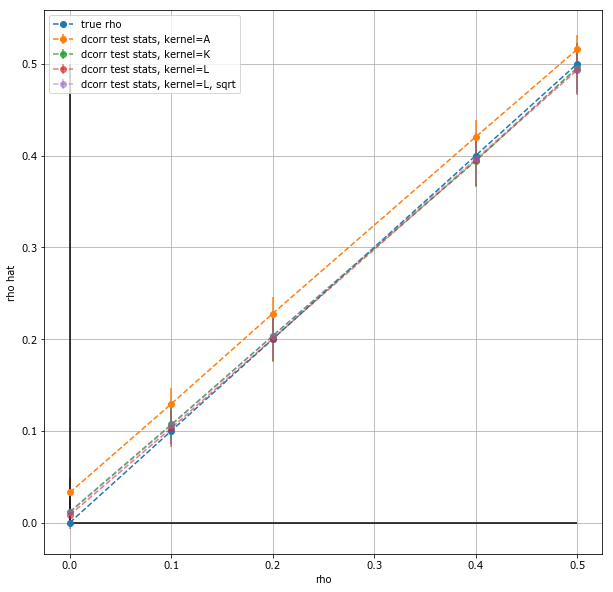

In [9]:
plt.figure(figsize=(10,10))
plt.plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle='--')
plt.errorbar(rho_arr, np.mean(dcorr_ts1, axis=1), yerr=np.std(dcorr_ts1, axis=1),
            marker='o', linestyle='--', label='dcorr test stats, kernel=A')
plt.errorbar(rho_arr, np.mean(dcorr_ts2, axis=1), yerr=np.std(dcorr_ts2, axis=1),
            marker='o', linestyle='--', label='dcorr test stats, kernel=K', alpha=0.8)
plt.errorbar(rho_arr, np.mean(dcorr_ts3, axis=1), yerr=np.std(dcorr_ts3, axis=1),
            marker='o', linestyle='--', label='dcorr test stats, kernel=L', alpha=0.6)
plt.errorbar(rho_arr, np.mean(dcorr_ts4, axis=1), yerr=np.std(dcorr_ts4, axis=1),
            marker='o', linestyle='--', label='dcorr test stats, kernel=L, sqrt', alpha=0.5)

plt.hlines(y=0, xmin=np.amin(rho_arr), xmax=np.amax(rho_arr))
plt.vlines(x=0, ymin=np.amin(rho_arr), ymax=np.amax(rho_arr))
plt.grid()
plt.xlabel('rho')
plt.ylabel('rho hat')
plt.legend()

In [10]:
rho_arr = np.around(np.linspace(-0.6, 0.3, 10), 1)
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.2, b=0.5)
k = 2
n = 100
mc = 500
indept_test = DCorr(compute_distance_matrix=identity)
dcorr_ts1 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(A),
            matrix_Y=new_distance(B))
        dcorr_ts1[i, j] = test_stat_alt

dcorr_ts2 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(to_kernel(A)),
            matrix_Y=new_distance(to_kernel(B)))
        dcorr_ts2[i, j] = test_stat_alt

dcorr_ts3 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(kernel1(A)),
            matrix_Y=new_distance(kernel1(B)))
        dcorr_ts3[i, j] = test_stat_alt

dcorr_ts4 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=np.sqrt(new_distance(kernel1(A))),
            matrix_Y=np.sqrt(new_distance(kernel1(B))))
        dcorr_ts4[i, j] = test_stat_alt

10it [00:12,  1.24s/it]
10it [00:14,  1.49s/it]
10it [00:14,  1.40s/it]
10it [00:14,  1.38s/it]


In [45]:
dcorr_ts5 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=500)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(A),
            matrix_Y=new_distance(B))
        dcorr_ts5[i, j] = test_stat_alt

10it [03:44, 22.45s/it]


In [51]:
dcorr_ts6 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_ER_marg(rho=rho, p=0.7, q=0.3, n=100)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(A),
            matrix_Y=new_distance(B))
        dcorr_ts6[i, j] = test_stat_alt


0it [00:00, ?it/s]
1it [00:01,  1.18s/it]
2it [00:02,  1.16s/it]
3it [00:03,  1.13s/it]
4it [00:04,  1.12s/it]
5it [00:05,  1.12s/it]
6it [00:06,  1.15s/it]
7it [00:07,  1.12s/it]
8it [00:09,  1.14s/it]
9it [00:10,  1.15s/it]
10it [00:11,  1.16s/it]

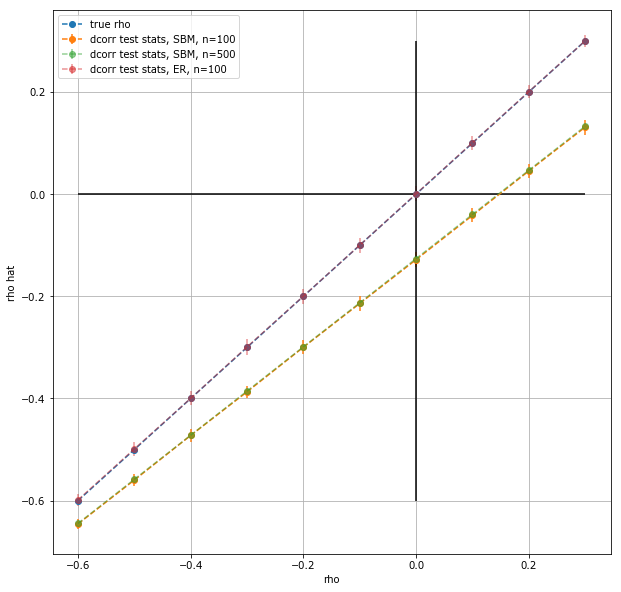

In [52]:
plt.figure(figsize=(10,10))
plt.plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle='--')
plt.errorbar(rho_arr, np.mean(dcorr_ts1, axis=1), yerr=np.std(dcorr_ts1, axis=1),
            marker='o', linestyle='--', label='dcorr test stats, SBM, n=100')
plt.errorbar(rho_arr, np.mean(dcorr_ts5, axis=1), yerr=np.std(dcorr_ts5, axis=1),
            marker='o', linestyle='--', label='dcorr test stats, SBM, n=500', alpha=0.5)
plt.errorbar(rho_arr, np.mean(dcorr_ts6, axis=1), yerr=np.std(dcorr_ts6, axis=1),
            marker='o', linestyle='--', label='dcorr test stats, ER, n=100', alpha=0.5)

plt.hlines(y=0, xmin=np.amin(rho_arr), xmax=np.amax(rho_arr))
plt.vlines(x=0, ymin=np.amin(rho_arr), ymax=np.amax(rho_arr))
plt.grid()
plt.xlabel('rho')
plt.ylabel('rho hat')
plt.legend()

In [34]:
from scipy.sparse.linalg import arpack
def isPSD(A, tol = 1e-8):
    vals, vecs = arpack.eigsh(A, k = 2, which = 'BE') # return the ends of spectrum of A
    return np.all(vals > -tol)

In [37]:
indept_test = DCorr(compute_distance_matrix=identity, which_test='unbiased')
A, B = rho_sbm_marg(rho=-0.5, AL=P1, BL=P2, k=k, n=n)
k1 = kernel1(A)
k2 = kernel1(B)
#k1 = to_kernel(A)
#k2 = to_kernel(B)
d1 = new_distance(k1)
d2 = new_distance(k2)
test_stat_alt, _ = indept_test.test_statistic(
    matrix_X=d1,
    matrix_Y=d2)

In [42]:
test_stat_alt

-0.5714586243752273

In [3]:
%%time
n_arr = np.linspace(10, 100, 10, dtype=int)
rho_arr = np.array([0.1])
k = 2
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.2, b=0.5)
nmc = 500
power_sbm_marg = np.zeros((rho_arr.shape[0], n_arr.shape[0])),

for i, rho in enumerate(rho_arr):
    for j, n in enumerate(n_arr):
        blocks = np.repeat(np.arange(k), n//k)
        test = RVCorr(which_test='pearson')
        test_power, null, alt = pearson_power(test, rho_sbm_marg, given_blocks=True, blocks=blocks,
                                   rho=rho, AL=P1, BL=P2, k=k, n=n, mc=nmc)
        print('finish rho={}, n={}'.format(rho, n))

finish rho=0.1, n=10
finish rho=0.1, n=20
finish rho=0.1, n=30
finish rho=0.1, n=40
finish rho=0.1, n=50
finish rho=0.1, n=60
finish rho=0.1, n=70
finish rho=0.1, n=80
finish rho=0.1, n=90
finish rho=0.1, n=100
CPU times: user 50.8 s, sys: 200 ms, total: 51 s
Wall time: 51.1 s


In [4]:
power_sbm_marg

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),)

Compare the test stats in the following two plots, it explains why we are getting zero power for pearson but not other tests. Only for pearson, we took the absolute value of the test statistics (in other word, we did a two tailed test but assume the null is test stats=0) in absolute value, rho=0.1 has smaller test stats than rho=0, so pearson has zero power

[]

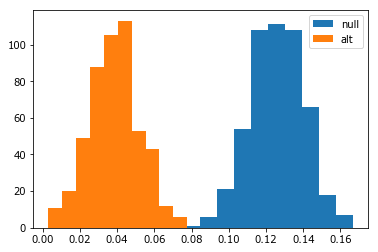

In [6]:
plt.hist(null, label='null')
plt.hist(alt, label='alt')
plt.legend()
plt.plot()

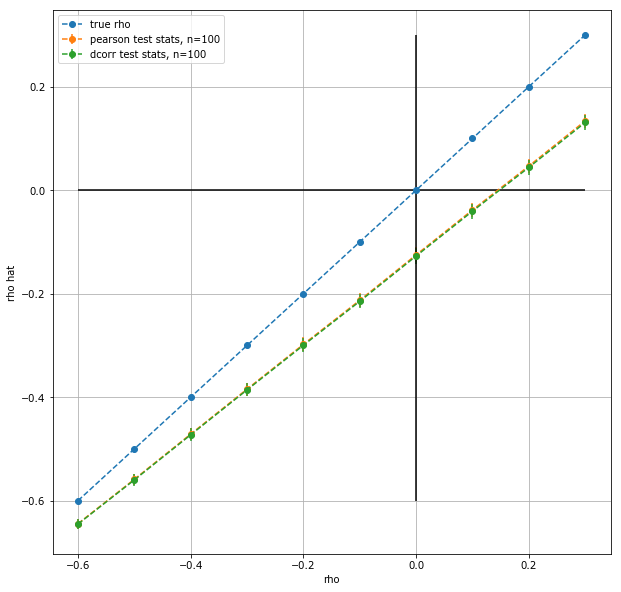

In [6]:
with open('../../results/rho_sbm_marg_teststats.pkl', 'rb') as f:
    ts = pickle.load(f)
plt.figure(figsize=(10,10))
plt.plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle='--')
test_names = ['pearson', 'dcorr']
for name in test_names:
    plt.errorbar(rho_arr, np.mean(ts[name], axis=1), yerr=np.std(ts[name], axis=1),
             marker='o', linestyle='--', label='{} test stats, n=100'.format(name))

plt.hlines(y=0, xmin=np.amin(rho_arr), xmax=np.amax(rho_arr))
plt.vlines(x=0, ymin=np.amin(rho_arr), ymax=np.amax(rho_arr))
plt.grid()
plt.xlabel('rho')
plt.ylabel('rho hat')
plt.legend()